In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nose as ns
import problem2 as p2
import problem3 as p3
import problem4 as p4

%matplotlib inline

In [2]:
X, Y = p2.loadData()
X = p2.appendConstant(X)
(X, Y), (X_test, Y_test) = p2.splitData(X,Y)

In [3]:
X.shape

(8, 320)

In [4]:
'''
train_ratio = 0.8
m = X.shape[1]
index_for_split = int(m*train_ratio)


training_X = X[:,:index_for_split]
training_y = y[:index_for_split]

test_X = X[:, index_for_split:]
test_Y = y[index_for_split:]
'''

'\ntrain_ratio = 0.8\nm = X.shape[1]\nindex_for_split = int(m*train_ratio)\n\n\ntraining_X = X[:,:index_for_split]\ntraining_y = y[:index_for_split]\n\ntest_X = X[:, index_for_split:]\ntest_Y = y[index_for_split:]\n'

# Start of Bulding the Models (BGD)

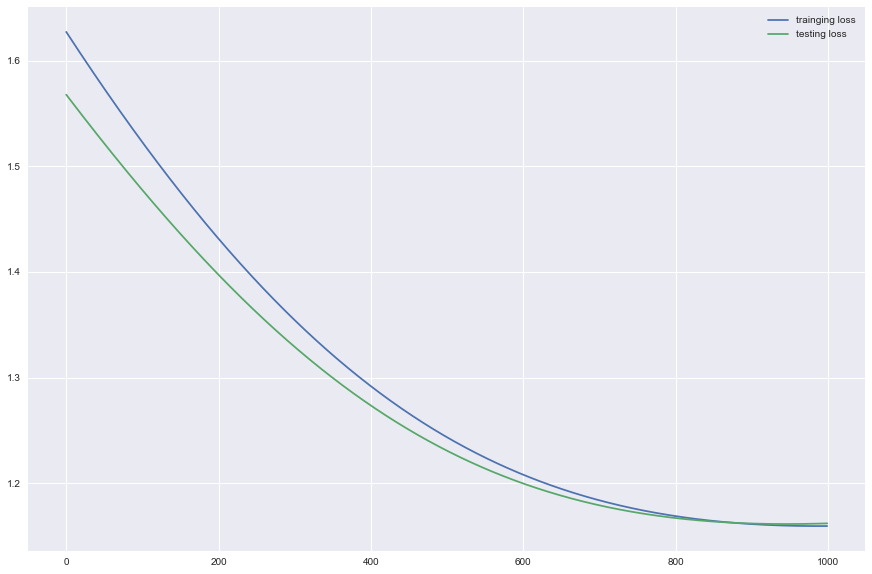

In [5]:
import random

#random.seed(123)

X, Y = p2.loadData()
X = p2.appendConstant(X)
(X, Y), (X_test, Y_test) = p2.splitData(X,Y)


num_iters = 1000
lr = 0.01
# threshold = 0.00001

Y_shaped = np.reshape(Y, (len(Y), 1))
trainging_log = []
#theta = np.array([np.linspace(-0.5,-0.5,8)]).T
theta = np.random.rand(len(X), 1)
# theta = np.atleast_2d([0 for i in range(len(X))]).T
theta_lst = []
#theta_lst.append(theta)
losers=[]
for i in range(num_iters):

    # Trainging
    
    Z = p4.linear(theta, X)
    # A = p4.sigmoid(Z)
    gradients = p4.dtheta(Z, X, Y)
    theta = theta - lr*gradients

    Z_new = p4.linear(theta, X)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_shaped)
    losers.append(loser)
    theta_lst.append(theta)
    #if i == 0 or losers[-1] - loser >= threshold:
       # losers.append(loser)
       # theta_lst.append(theta)
    #elif i > 0 and losers[-1] - loser <= threshold:
       # loser = losers[-1]
       # losers.append(loser)
        #theta = theta_lst[-1]
       # theta_lst.append(theta)

returning_theta = losers[-1]
theta = theta_lst[-1]
Y_shaped_testing = np.reshape(Y_test, (len(Y_test), 1))
losers_test = []

for i in range(num_iters):

    # Trainging
    
    #Z = p4.linear(theta_lst[i], X_test)
    # A = p4.sigmoid(Z)
    #gradients = p4.dtheta(Z, X_test, Y_test)
    #theta = theta - lr*gradients

    Z_new = p4.linear(theta_lst[i], X_test)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_shaped_testing)
    losers_test.append(loser)
    trainging_log.append((losers[i], losers_test[i], np.linalg.norm(theta_lst[i])))
'''
    if i == 0 or losers[-1] - loser >= threshold:
        losers_test.append(loser)

    elif i > 0 and losers[-1] - loser <= threshold:
        loser = losers[-1]
        losers_test.append(loser)
'''

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(losers), label = 'trainging loss')
    plt.plot(pd.Series(losers_test), label = 'testing loss')
    plt.axis()
    plt.legend()
    plt.show() 

# SGD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


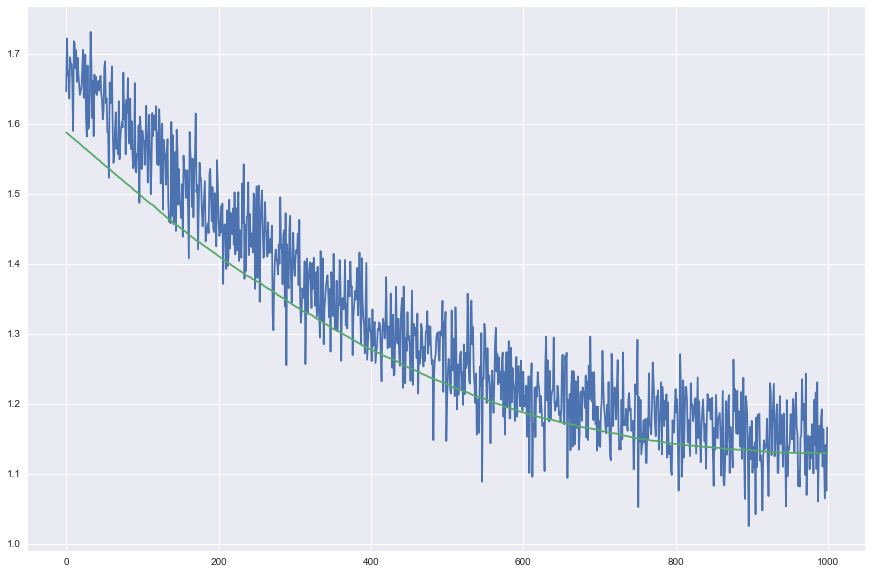

In [6]:
X, Y = p2.loadData()
X = p2.appendConstant(X)
(X, Y), (X_test, Y_test) = p2.splitData(X,Y)


num_iters = 1000
lr = 0.01
# threshold = 0.00001

Y_shaped = np.reshape(Y, (len(Y), 1))
trainging_log = []
#theta = np.array([np.linspace(-0.5,-0.5,8)]).T
theta = np.random.rand(len(X), 1)
# theta = np.atleast_2d([0 for i in range(len(X))]).T
theta_lst = []
#theta_lst.append(theta)
losers=[]

m = X.shape[1]
ran_batch_idx = list(np.random.randint(low = 0, high= m, size=200)) # Selecting the random batch sample

X_ran_batch = np.delete(X, ran_batch_idx, axis=1)
Y_ran_batch = np.delete(Y, ran_batch_idx)
Y_ran_batch_shaped = np.delete(Y_shaped, ran_batch_idx, axis=0)

for i in range(num_iters):

    # Trainging
    ran_batch_idx = list(np.random.randint(low = 0, high= m, size=200)) # Selecting the random batch sample

    X_ran_batch = np.delete(X, ran_batch_idx, axis=1)
    Y_ran_batch = np.delete(Y, ran_batch_idx)
    Y_ran_batch_shaped = np.delete(Y_shaped, ran_batch_idx, axis=0)
    Z = p4.linear(theta, X_ran_batch)
    # A = p4.sigmoid(Z)
    gradients = p4.dtheta(Z, X_ran_batch, Y_ran_batch)
    theta = theta - lr*gradients

    Z_new = p4.linear(theta, X_ran_batch)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_ran_batch_shaped)
    losers.append(loser)
    theta_lst.append(theta)


theta = theta_lst[-1]
Y_shaped_testing = np.reshape(Y_test, (len(Y_test), 1))
losers_test = []

for i in range(num_iters):

    # Trainging
    
    #Z = p4.linear(theta_lst[i], X_ran_batch_test)
    # A = p4.sigmoid(Z)
    #gradients = p4.dtheta(Z, X_ran_batch_test, Y_test)
    #theta = theta - lr*gradients

    Z_new = p4.linear(theta_lst[i], X_test)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_shaped_testing)
    losers_test.append(loser)
    trainging_log.append((losers[i], losers_test[i], np.linalg.norm(theta_lst[i])))
'''
    if i == 0 or losers[-1] - loser >= threshold:
        losers_test.append(loser)

    elif i > 0 and losers[-1] - loser <= threshold:
        loser = losers[-1]
        losers_test.append(loser)
'''

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(losers))
    plt.plot(pd.Series(losers_test))
    plt.axis()
    plt.legend()
    plt.show() 





## USing P3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


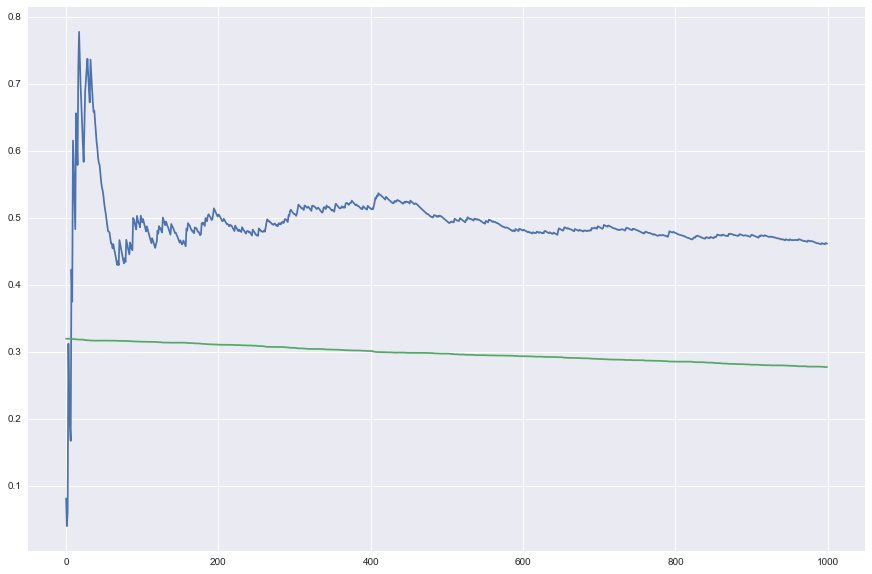

In [7]:
X, Y = p2.loadData()
X = p2.appendConstant(X)
(X, Y), (X_test, Y_test) = p2.splitData(X,Y)


num_iters = 1000
lr = 0.01
# threshold = 0.00001

lr = lr/10
Y_shaped = np.reshape(Y, (len(Y), 1))
trainging_log = []
#theta = np.array([np.linspace(-0.5,-0.5,8)]).T
theta = np.random.rand(len(X), 1)
# theta = np.atleast_2d([0 for i in range(len(X))]).T
theta_lst = []
#theta_lst.append(theta)
losers=[]
norms = []
m = X.shape[1]
chosen = []
loss=[]

for i in range(num_iters):

    
    idx = np.random.randint(0, m)

    X_sample = np.atleast_2d((X[:,idx])).T
    Z = p3.linear(theta, X_sample)
    # A = p4.sigmoid(Z)
    gradients = p3.dtheta(Z, X_sample, Y[idx])
    theta = theta - lr*gradients

    Z_new = p3.linear(theta, X_sample)

    phi = p3.sigmoid(Z_new)

    loser = p4.loss(phi, Y[idx])
    losers.append(loser)
    loss.append(np.mean(losers))
    theta_lst.append(theta)
    norms.append(np.linalg.norm(theta))
    # chosen.append(idx)

loss = [np.mean(losers[0:i]) if i > 1 else losers[i] for i in range(len(losers))]
theta = theta_lst[-1]
Y_shaped_testing = np.reshape(Y_test, (len(Y_test), 1))
losers_test = []

for i in range(num_iters):

    # Trainging
    
    #Z = p4.linear(theta_lst[i], X_ran_batch_test)
    # A = p4.sigmoid(Z)
    #gradients = p4.dtheta(Z, X_ran_batch_test, Y_test)
    #theta = theta - lr*gradients
    losers_inner = []
    for j in range(len(X_test)):

        Z_new = p3.linear(theta_lst[i], np.atleast_2d(X_test[:, j]).T)

        phi = p3.sigmoid(Z_new)

        loser = p3.loss(phi, Y_test[j])
        losers_inner.append(loser)
        
    losers_test.append(np.mean(losers_inner))

        #trainging_log.append((loss[i], losers_test[i], np.linalg.norm(theta)))




with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(loss))
    plt.plot(pd.Series(losers_test))
    plt.axis()
    plt.legend()
    plt.show() 

# Newton

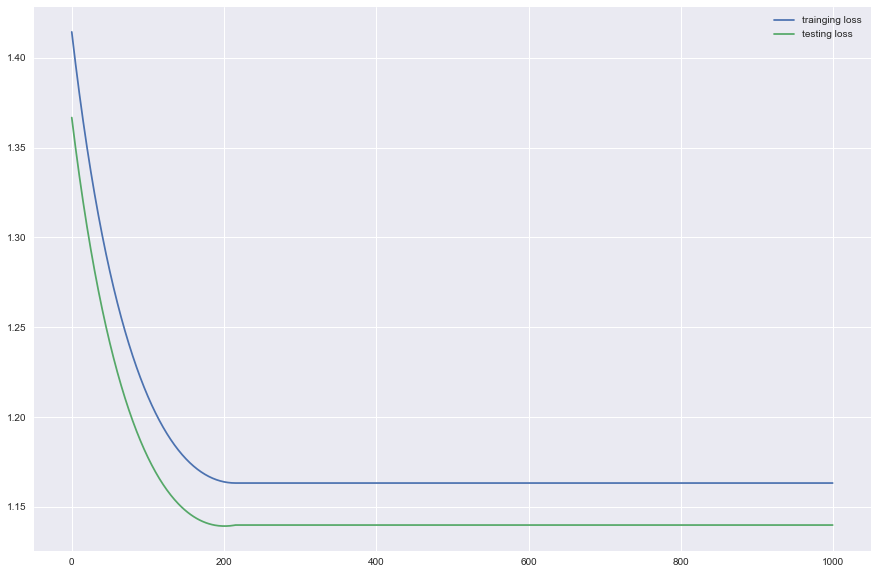

In [32]:
import random

#random.seed(123)

X, Y = p2.loadData()
X = p2.appendConstant(X)
(X, Y), (X_test, Y_test) = p2.splitData(X,Y)


num_iters = 1000
lr = 0.01
# threshold = 0.00001

Y_shaped = np.reshape(Y, (len(Y), 1))
trainging_log = []
#theta = np.array([np.linspace(-0.5,-0.5,8)]).T
theta = np.random.rand(len(X), 1)
# theta = np.atleast_2d([0 for i in range(len(X))]).T
theta_lst = []
#theta_lst.append(theta)
losers=[]

for i in range(num_iters):

    # Trainging
    
    Z = p4.linear(theta, X)
    # A = p4.sigmoid(Z)
    gradients = p4.dtheta(Z, X, Y)
    hess = p4.Hessian(Z, X)
    hess_inv = np.linalg.inv(hess)


    theta = theta - np.dot(hess_inv,gradients)

    Z_new = p4.linear(theta, X)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_shaped)

    if i == 0 or min(losers) > loser:
        losers.append(loser)
        theta_lst.append(theta)
    elif i > 0 and min(losers) < loser:
        loser = losers[-1]
        losers.append(loser)
        theta = theta_lst[-1]
        theta_lst.append(theta)

returning_theta = losers[-1]
theta = theta_lst[-1]
Y_shaped_testing = np.reshape(Y_test, (len(Y_test), 1))
losers_test = []

for i in range(num_iters):

    # Trainging
    
    #Z = p4.linear(theta_lst[i], X_test)
    # A = p4.sigmoid(Z)
    #gradients = p4.dtheta(Z, X_test, Y_test)
    #theta = theta - lr*gradients

    Z_new = p4.linear(theta_lst[i], X_test)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_shaped_testing)
    losers_test.append(loser)
    trainging_log.append((losers[i], losers_test[i], np.linalg.norm(theta_lst[i])))



with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(losers), label = 'trainging loss')
    plt.plot(pd.Series(losers_test), label = 'testing loss')
    plt.axis()
    plt.legend()
    plt.show() 

In [10]:
sigma_m = np.diagflat(np.diag(p4.sigmoid(Z)*p4.sigmoid(-Z).T))

In [14]:
sigma_m.shape

(320, 320)

In [22]:
p4.dtheta(Z, X, Y).shape

(8, 1)

In [25]:
check = np.dot(np.linalg.inv((np.dot(np.dot(X,sigma_m), X.T))),p4.dtheta(Z, X, Y))
check.shape

(8, 1)

In [13]:
X.shape

(8, 320)

In [ ]:
theta.shape

(8, 8)

In [9]:
p4.Hessian(Z,X).shape

(8, 8)

In [ ]:
check = p4.sigmoid(Z)*p4.sigmoid(-Z).T
check

array([[5.41177339e-03, 5.23718452e-03, 2.79625185e-03, ...,
        4.51436086e-05, 2.40037295e-03, 4.78778893e-03],
       [3.73225750e-02, 3.61185139e-02, 1.92844955e-02, ...,
        3.11335231e-04, 1.65542962e-02, 3.30192339e-02],
       [4.83468538e-01, 4.67871391e-01, 2.49807170e-01, ...,
        4.03296902e-03, 2.14440760e-01, 4.27723991e-01],
       ...,
       [9.86307412e-01, 9.54488213e-01, 5.09622951e-01, ...,
        8.22752037e-03, 4.37473165e-01, 8.72584893e-01],
       [5.55826033e-01, 5.37894565e-01, 2.87194134e-01, ...,
        4.63655646e-03, 2.46534671e-01, 4.91738573e-01],
       [1.19461682e-01, 1.15607736e-01, 6.17255982e-02, ...,
        9.96518337e-04, 5.29868066e-02, 1.05687596e-01]])

In [ ]:
np.diag(check)

array([0.00541177, 0.03611851, 0.24980717, 0.22246368, 0.10313664,
       0.01805609, 0.19757375, 0.18633225, 0.01075644, 0.22735084,
       0.13554183, 0.02546441, 0.0219608 , 0.24866306, 0.21525736,
       0.23313429, 0.22011531, 0.21968071, 0.20261427, 0.21803866,
       0.17544116, 0.24724158, 0.00286043, 0.00234592, 0.00890572,
       0.00259131, 0.04645482, 0.01903081, 0.00476657, 0.01614259,
       0.11328051, 0.10492554, 0.01916162, 0.00661207, 0.00495691,
       0.00650973, 0.24334025, 0.00604943, 0.02059573, 0.22574797,
       0.24833377, 0.15468181, 0.12899753, 0.02144018, 0.01134763,
       0.01268367, 0.00719299, 0.00553626, 0.06629516, 0.0997596 ,
       0.24657365, 0.09780841, 0.07436318, 0.15413159, 0.24764669,
       0.22276691, 0.11103342, 0.0654217 , 0.01841376, 0.05233654,
       0.13245707, 0.24228023, 0.16269748, 0.24396521, 0.21002356,
       0.10724485, 0.20486072, 0.23920354, 0.11519091, 0.01885895,
       0.0019603 , 0.00176155, 0.00508388, 0.05150293, 0.16817

In [ ]:
np.diag

array([[5.41177339e-03, 5.23718452e-03, 2.79625185e-03, ...,
        4.51436086e-05, 2.40037295e-03, 4.78778893e-03],
       [3.73225750e-02, 3.61185139e-02, 1.92844955e-02, ...,
        3.11335231e-04, 1.65542962e-02, 3.30192339e-02],
       [4.83468538e-01, 4.67871391e-01, 2.49807170e-01, ...,
        4.03296902e-03, 2.14440760e-01, 4.27723991e-01],
       ...,
       [9.86307412e-01, 9.54488213e-01, 5.09622951e-01, ...,
        8.22752037e-03, 4.37473165e-01, 8.72584893e-01],
       [5.55826033e-01, 5.37894565e-01, 2.87194134e-01, ...,
        4.63655646e-03, 2.46534671e-01, 4.91738573e-01],
       [1.19461682e-01, 1.15607736e-01, 6.17255982e-02, ...,
        9.96518337e-04, 5.29868066e-02, 1.05687596e-01]])

In [ ]:
Y_ran_batch.shape

(176,)

In [ ]:
X_ran_batch.shape

(8, 176)

In [ ]:
X[0][399]

IndexError: index 399 is out of bounds for axis 0 with size 320

In [ ]:
ran_batch_idx

[117,
 309,
 196,
 16,
 13,
 221,
 159,
 11,
 115,
 250,
 310,
 191,
 24,
 318,
 278,
 131,
 243,
 36,
 169,
 160,
 316,
 144,
 49,
 124,
 238,
 308,
 278,
 258,
 112,
 280,
 297,
 245,
 218,
 262,
 133,
 13,
 289,
 242,
 298,
 81,
 83,
 38,
 181,
 159,
 33,
 30,
 108,
 282,
 102,
 119,
 294,
 83,
 237,
 45,
 70,
 174,
 228,
 15,
 301,
 240,
 139,
 91,
 93,
 309,
 18,
 286,
 152,
 41,
 12,
 189,
 217,
 190,
 238,
 237,
 49,
 276,
 196,
 43,
 169,
 145,
 65,
 153,
 72,
 66,
 180,
 117,
 61,
 65,
 71,
 57,
 165,
 11,
 66,
 24,
 297,
 236,
 309,
 93,
 319,
 226,
 203,
 126,
 264,
 247,
 161,
 237,
 198,
 158,
 41,
 195,
 270,
 98,
 149,
 221,
 236,
 269,
 63,
 306,
 208,
 139,
 284,
 211,
 78,
 117,
 235,
 294,
 29,
 23,
 3,
 117,
 130,
 146,
 318,
 236,
 210,
 22,
 173,
 267,
 1,
 78,
 119,
 188,
 219,
 5,
 65,
 3,
 192,
 38,
 266,
 90,
 227,
 136,
 258,
 74,
 66,
 84,
 227,
 242,
 193,
 135,
 167,
 12,
 291,
 272,
 285,
 245,
 227,
 312,
 80,
 34,
 204,
 276,
 195,
 46,
 12,
 239,
 317,

In [ ]:
len(theta_lst)

1000

In [ ]:
X

array([[ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.76,  0.63, -0.07, ..., -1.47,  0.63,  0.89],
       [ 1.75, -0.07, -0.56, ..., -1.39,  0.59,  0.92],
       ...,
       [ 1.17,  1.17,  0.05, ..., -1.06, -1.62, -0.5 ],
       [ 1.76,  0.46, -1.01, ..., -0.99,  0.34,  0.15],
       [ 0.91,  0.91,  0.91, ..., -1.1 ,  0.91,  0.91]])

In [ ]:
X_test

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 0.02,  0.54, -0.24, -1.03, -0.16,  0.8 , -1.55, -1.9 ,  0.63,
        -1.73,  0.89, -0.51, -0.77,  0.19, -0.42,  0.71,  0.19,  1.33,
         0.54,  0.63, -0.42,  0.8 , -0.77, -1.03, -1.9 , -0.07, -1.12,
        -1.55, -1.29, -0.33,  0.1 ,  0.71, -1.2 , -1.47, -1.73,  0.02,
         0.89, -1.38, -0.24,  0.37,  0.45,  1.5 ,  1.85, -0.94, -0.33,
         1.1

In [ ]:
import random

# random.seed(123)

X, Y = p2.loadData()
X = p2.appendConstant(X)
(X, Y), (X_test, Y_test) = p2.splitData(X,Y)


num_iters = 1000
lr = 0.01
threshold = 0.00001

Y_shaped = np.reshape(Y, (len(Y), 1))
trainging_log = []
# theta = np.array([np.linspace(-0.5,-0.5,8)]).T
theta = np.random.rand(len(X), 1)
# theta = np.atleast_2d([0 for i in range(len(X))]).T
theta_lst = []
theta_lst.append(theta)
losers=[]
for i in range(num_iters):

    # Trainging
    
    Z = p4.linear(theta, X)
    # A = p4.sigmoid(Z)
    gradients = p4.dtheta(Z, X, Y)
    theta = theta - lr*gradients
    
    Z_new = p4.linear(theta, X)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_shaped)

    if i == 0 or losers[-1] - loser >= threshold:
        losers.append(loser)
        theta_lst.append(theta)
    elif i > 0 and losers[-1] - loser <= threshold:
        loser = losers[-1]
        losers.append(loser)
        theta = theta_lst[-1]
        theta_lst.append(theta)

returning_theta = losers[-1]

Y_shaped_testing = np.reshape(Y_test, (len(Y_test), 1))
losers_test = []




with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(losers))
    plt.plot(pd.Series(losers_test))
    plt.axis()
    plt.legend()
    plt.show() 

In [ ]:
theta_lst[-5]

array([[-1.15875867],
       [ 0.78435043],
       [ 0.5423159 ],
       [ 0.7678067 ],
       [ 0.253726  ],
       [ 0.42654594],
       [ 0.12155384],
       [ 0.43024385]])

In [ ]:
X, Y = p2.loadData()
X = p2.appendConstant(X)
(X_train, Y_train), (X_test, Y_test) = p2.splitData(X,Y)

In [ ]:
X

array([[ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.76,  0.63, -0.07, ...,  1.15, -0.42,  1.41],
       [ 1.75, -0.07, -0.56, ...,  1.42, -0.73,  1.58],
       ...,
       [ 1.17,  1.17,  0.05, ...,  1.17,  0.61,  0.61],
       [ 1.76,  0.46, -1.01, ...,  1.43,  0.3 ,  1.78],
       [ 0.91,  0.91,  0.91, ...,  0.91, -1.1 ,  0.91]])

In [ ]:
X_train

array([[ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.76,  0.63, -0.07, ..., -1.47,  0.63,  0.89],
       [ 1.75, -0.07, -0.56, ..., -1.39,  0.59,  0.92],
       ...,
       [ 1.17,  1.17,  0.05, ..., -1.06, -1.62, -0.5 ],
       [ 1.76,  0.46, -1.01, ..., -0.99,  0.34,  0.15],
       [ 0.91,  0.91,  0.91, ..., -1.1 ,  0.91,  0.91]])

In [ ]:
for i in range(num_iters):

    # Trainging
    
    Z = p4.linear(theta, X_test)
    # A = p4.sigmoid(Z)
    gradients = p4.dtheta(Z, X_test, Y_test)
    theta = theta - lr*gradients

    Z_new = p4.linear(theta, X_test)

    phi = p4.sigmoid(Z_new)

    loser = p4.loss(phi, Y_shaped_testing)
    losers_test.append(loser)
'''
    if i == 0 or losers[-1] - loser >= threshold:
        losers_test.append(loser)

    elif i > 0 and losers[-1] - loser <= threshold:
        loser = losers[-1]
        losers_test.append(loser)
'''

In [ ]:
Y_shaped_testing

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


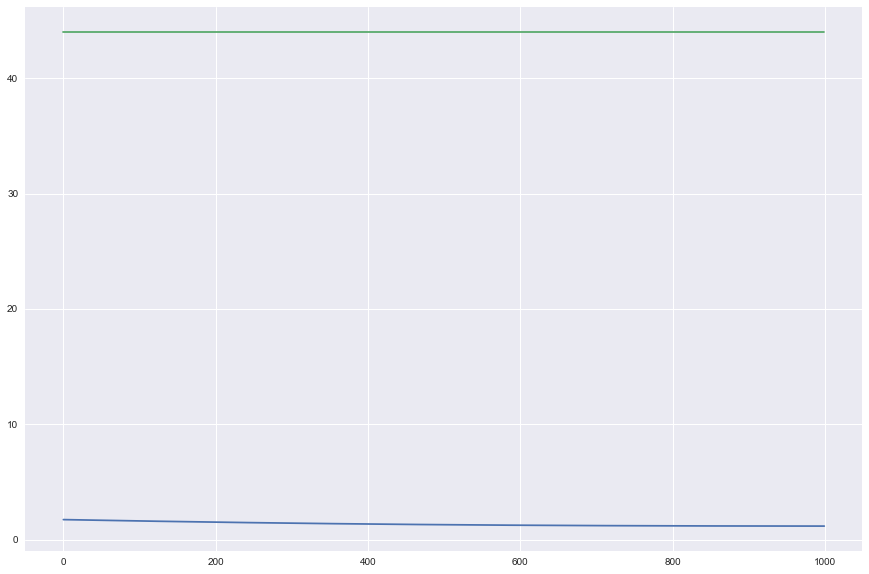

In [ ]:
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(losers))
    plt.plot(pd.Series(losers_test))
    plt.axis()
    plt.legend()
    plt.show() 

In [ ]:
losers

[1.6086837603153623,
 1.6076096960887065,
 1.6065369224894233,
 1.6054654410753613,
 1.6043952533999246,
 1.603326361012037,
 1.6022587654561251,
 1.601192468272094,
 1.6001274709953004,
 1.5990637751565324,
 1.5980013822819847,
 1.596940293893231,
 1.595880511507214,
 1.5948220366362023,
 1.5937648707877827,
 1.5927090154648251,
 1.5916544721654702,
 1.5906012423830953,
 1.5895493276063004,
 1.5884987293188733,
 1.5874494489997752,
 1.5864014881231165,
 1.5853548481581274,
 1.5843095305691353,
 1.583265536815552,
 1.582222868351831,
 1.5811815266274627,
 1.58014151308694,
 1.5791028291697362,
 1.5780654763102833,
 1.5770294559379472,
 1.5759947694770056,
 1.5749614183466238,
 1.5739294039608287,
 1.5728987277284916,
 1.571869391053295,
 1.570841395333721,
 1.569814741963016,
 1.5687894323291758,
 1.567765467814918,
 1.5667428497976623,
 1.5657215796495008,
 1.5647016587371818,
 1.5636830884220814,
 1.562665870060182,
 1.5616500050020512,
 1.560635494592812,
 1.559622340172128,
 1.5586

In [ ]:
Z.shape

(1, 80)

In [ ]:
import sklearn as sk


In [ ]:
(Y_shaped - p4.sigmoid(Z)).shape

(320, 80)

In [ ]:
theta.shape

(8, 1)

In [ ]:
trainging_log

[]

In [ ]:
losers

[1.6086837603153623,
 1.6076096960887065,
 1.6065369224894233,
 1.6054654410753613,
 1.6043952533999246,
 1.603326361012037,
 1.6022587654561251,
 1.601192468272094,
 1.6001274709953004,
 1.5990637751565324,
 1.5980013822819847,
 1.596940293893231,
 1.595880511507214,
 1.5948220366362023,
 1.5937648707877827,
 1.5927090154648251,
 1.5916544721654702,
 1.5906012423830953,
 1.5895493276063004,
 1.5884987293188733,
 1.5874494489997752,
 1.5864014881231165,
 1.5853548481581274,
 1.5843095305691353,
 1.583265536815552,
 1.582222868351831,
 1.5811815266274627,
 1.58014151308694,
 1.5791028291697362,
 1.5780654763102833,
 1.5770294559379472,
 1.5759947694770056,
 1.5749614183466238,
 1.5739294039608287,
 1.5728987277284916,
 1.571869391053295,
 1.570841395333721,
 1.569814741963016,
 1.5687894323291758,
 1.567765467814918,
 1.5667428497976623,
 1.5657215796495008,
 1.5647016587371818,
 1.5636830884220814,
 1.562665870060182,
 1.5616500050020512,
 1.560635494592812,
 1.559622340172128,
 1.5586

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


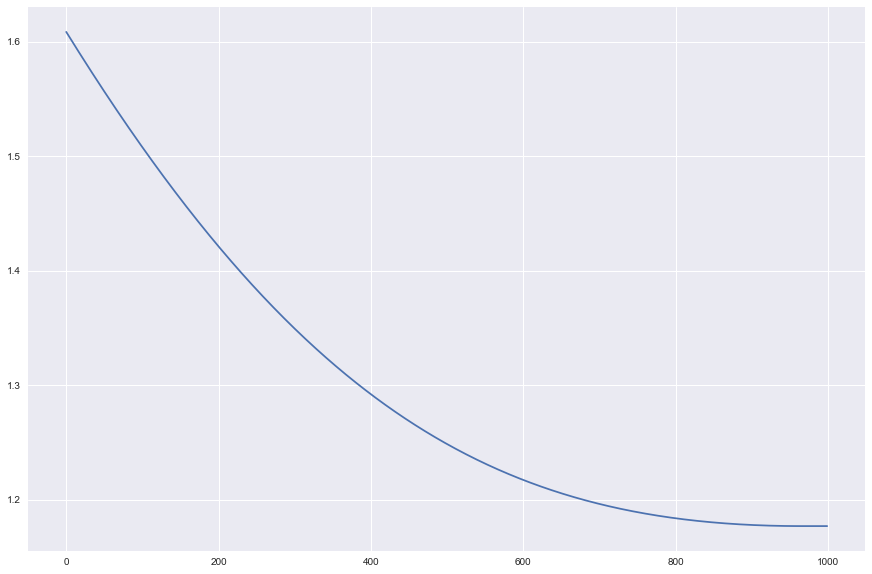

In [ ]:
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(losers))

    plt.axis()
    plt.legend()
    plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


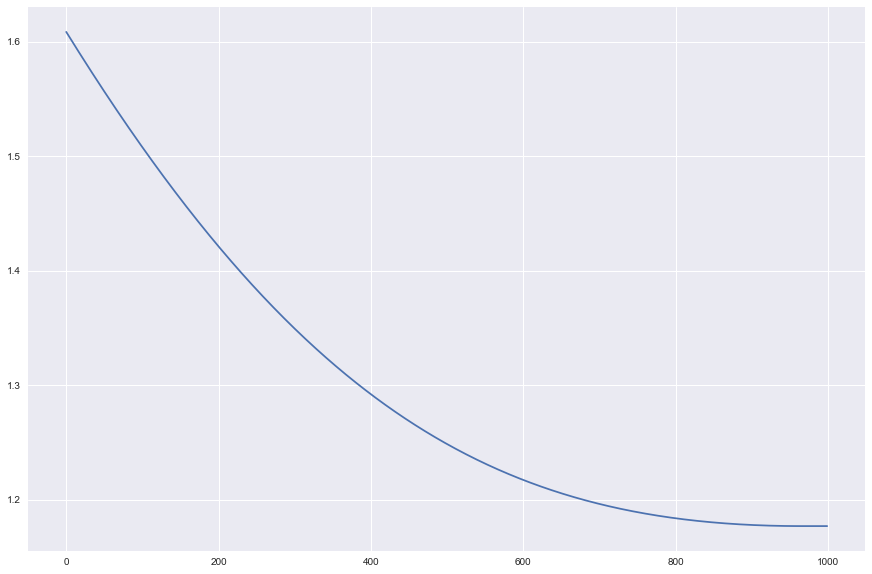

In [ ]:
with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes()
    plt.plot(pd.Series(losers))

    plt.axis()
    plt.legend()
    plt.show()

In [ ]:
checker = []
checks = []
for i in range(len(yy)):
    #print(p4.loss(yy[i], Y_shaped))
    checks.append(Y_shaped*np.log(yy[i])+(1-Y_shaped)*(np.log(1-yy[i])))
    for j in range(len(yy[i])):
        for t in range(len(yy[i][j])):
            if 1-yy[i][j][t] <= 0:
                checker.append(yy[i][j][t])

NameError: name 'yy' is not defined

In [ ]:
checks[0]

array([[-0.01911987, -0.07671043, -0.50556719, ..., -2.83851855,
        -0.46281364, -0.14606368],
       [-3.96657188, -2.60582769, -0.92423059, ..., -0.06029398,
        -0.99292866, -1.99585563],
       [-3.96657188, -2.60582769, -0.92423059, ..., -0.06029398,
        -0.99292866, -1.99585563],
       ...,
       [-3.96657188, -2.60582769, -0.92423059, ..., -0.06029398,
        -0.99292866, -1.99585563],
       [-3.96657188, -2.60582769, -0.92423059, ..., -0.06029398,
        -0.99292866, -1.99585563],
       [-3.96657188, -2.60582769, -0.92423059, ..., -0.06029398,
        -0.99292866, -1.99585563]])

In [ ]:
Y_shaped*np.log(yy[i])

array([[-8.78630478e-03, -6.86298463e-01, -4.90337054e+00, ...,
        -9.87482158e+00, -2.03302621e+00, -9.08819119e-01],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
(1-Y_shaped)*(np.where(1-yy[i]>0, np.log(1-yy[i]),0)) 

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.73895098e+00, -7.00043126e-01, -7.44920289e-03, ...,
        -5.14553638e-05, -1.40341584e-01, -5.15837894e-01],
       [-4.73895098e+00, -7.00043126e-01, -7.44920289e-03, ...,
        -5.14553638e-05, -1.40341584e-01, -5.15837894e-01],
       ...,
       [-4.73895098e+00, -7.00043126e-01, -7.44920289e-03, ...,
        -5.14553638e-05, -1.40341584e-01, -5.15837894e-01],
       [-4.73895098e+00, -7.00043126e-01, -7.44920289e-03, ...,
        -5.14553638e-05, -1.40341584e-01, -5.15837894e-01],
       [-4.73895098e+00, -7.00043126e-01, -7.44920289e-03, ...,
        -5.14553638e-05, -1.40341584e-01, -5.15837894e-01]])

In [ ]:
(1-Y_shaped)

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [ ]:
len(checker)

0

In [ ]:
yy[0][0][0]

0.9810617553742923

In [ ]:
np.log(-120)

C:\Users\Chaz\AppData\Local\Temp\ipykernel_19900\1977919805.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-120)


nan

In [ ]:
trainging_log

[(1.302858403716566, 0, 1.2823216056856683),
 (1.3023093211755739, 0, 1.2810179392500687),
 (1.301760787046644, 0, 1.2797208619781886),
 (1.3012128020112648, 0, 1.2784303629294127),
 (1.3006653667861354, 0, 1.2771464312074865),
 (1.3001184821223368, 0, 1.275869055959404),
 (1.2995721488045098, 0, 1.274598226374307),
 (1.2990263676500535, 0, 1.2733339316823993),
 (1.2984811395083355, 0, 1.2720761611538705),
 (1.2979364652599161, 0, 1.2708249040978339),
 (1.2973923458157872, 0, 1.2695801498612775),
 (1.2968487821166232, 0, 1.2683418878280248),
 (1.2963057751320475, 0, 1.2671101074177085),
 (1.2957633258599068, 0, 1.2658847980847574),
 (1.2952214353255675, 0, 1.2646659493173946),
 (1.2946801045812129, 0, 1.263453550636646),
 (1.2941393347051613, 0, 1.262247591595362),
 (1.2935991268011944, 0, 1.2610480617772506),
 (1.2930594819978936, 0, 1.259854950795921),
 (1.2925204014479947, 0, 1.2586682482939393),
 (1.2919818863277461, 0, 1.257487943941897),
 (1.2914439378362856, 0, 1.256314027437485

In [ ]:
X = np.array([[2, 2], [1,1]])
Z = np.array([[5.5, 5.5]])
Y = np.array([[1, 0]])
np.mean(np.asmatrix([[-0.008, -0.004], [1.9918, 0.9959]]).T, axis=1)

matrix([[0.9919 ],
        [0.49595]])

In [ ]:
p4.dtheta(Z,X,Y)

array([[0.99185972],
       [0.49592986]])

In [ ]:
-np.atleast_2d(np.mean(X.T(p4.sigmoid(Z)-Y), axis=0)).T

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
np.mean(X.T*(p4.sigmoid(Z)-Y), axis=1)

ValueError: operands could not be broadcast together with shapes (2,3) (1,2) 

In [ ]:
(p4.sigmoid(Z)-Y)*X

array([[-0.00814028,  1.99185972],
       [-0.00407014,  0.99592986]])

In [ ]:
theta = np.array([1.5, 1, 2]).T
X = np.array([[1,1],[2, 2], [1, 1]])
Z = p4.linear(theta, X)
A = p4.sigmoid(Z)
Y = np.array([[1, 0]])
p4.loss(A, Y)


5.508156886541163

In [ ]:
Y*np.log1p(A)

array([[0.69111004, 0.        ]])

In [ ]:
Y*np.log(A)

array([[-0.00407844, -0.        ]])

In [ ]:
np.log

<ufunc 'log'>

In [ ]:
np.mean([0.00407,5.50407])

2.7540699999999996

In [ ]:
trainging_log

[(0.6930216886883085, 0, 0.03724190807137673),
 (0.6941414236673339, 0, 0.0725168668513557),
 (0.6962823261299154, 0, 0.10595220104100668),
 (0.6992497536431705, 0, 0.1376753184006625),
 (0.7028773991312757, 0, 0.16781040933602184),
 (0.7070250127121899, 0, 0.19647617774924458),
 (0.7115755295651041, 0, 0.22378443118312022),
 (0.7164320265069637, 0, 0.2498393385484838),
 (0.7215147741500968, 0, 0.274737176598798),
 (0.7267585332531985, 0, 0.29856641456635),
 (0.7321101623828414, 0, 0.32140801865636237),
 (0.7375265524172454, 0, 0.34333588818667765),
 (0.7429728736335689, 0, 0.3644173603906764),
 (0.7484211059908978, 0, 0.3847137406888724),
 (0.753848817300375, 0, 0.40428083004086046),
 (0.7592381534408327, 0, 0.42316943167368143),
 (0.7645750071223105, 0, 0.4414258269603221),
 (0.7698483353599744, 0, 0.4590922153073473),
 (0.7750495998795662, 0, 0.47620711626548295),
 (0.7801723086294123, 0, 0.49280573421069185),
 (0.7852116401751604, 0, 0.5089202872336446),
 (0.7901641359041776, 0, 0.

In [ ]:
Y.reshape(Y, len())

TypeError: len() takes exactly one argument (0 given)

In [ ]:
Z

array([[159.0175425 ,   8.17973749,  16.84820806,  14.91246172,
         17.2802352 ,  15.10123457,  16.82468348,   0.40782357]])

In [ ]:
np.array([np.mean(-(p4.sigmoid(Z)-Y_shaped)*X.T, axis=1)]).T

ValueError: operands could not be broadcast together with shapes (320,2) (2,3) 

In [ ]:
-(Y_shaped-p4.sigmoid(Z))*X.T

array([[-0.00000000e+00, -4.32252195e-01, -4.34500923e-04, ...,
        -1.87022990e-02, -2.60787556e-03, -9.08333373e-01],
       [ 1.00000000e+00,  4.75273362e-01, -6.99826200e-02, ...,
         1.15129770e+00,  4.59318396e-01,  1.66662696e-03],
       [ 1.00000000e+00, -5.28081513e-02, -5.59860960e-01, ...,
         4.92007565e-02, -1.00850344e+00,  1.66662696e-03],
       ...,
       [ 1.00000000e+00, -1.10897118e+00, -1.38965488e+00, ...,
        -1.04305604e+00, -9.88533070e-01, -2.01460402e-03],
       [ 1.00000000e+00,  4.75273362e-01,  5.89853511e-01, ...,
        -1.59410451e+00,  3.39496206e-01,  1.66662696e-03],
       [ 1.00000000e+00,  6.71417924e-01,  9.19771577e-01, ...,
        -4.92007565e-01,  1.49777738e-01,  1.66662696e-03]])

In [ ]:
Y_shaped-p4.sigmoid(Z)

array([[ 0.00000000e+00,  2.45597838e-01,  2.48286242e-04, ...,
         1.59848710e-02,  1.48174748e-03,  9.98168542e-01],
       [-1.00000000e+00, -7.54402162e-01, -9.99751714e-01, ...,
        -9.84015129e-01, -9.98518253e-01, -1.83145820e-03],
       [-1.00000000e+00, -7.54402162e-01, -9.99751714e-01, ...,
        -9.84015129e-01, -9.98518253e-01, -1.83145820e-03],
       ...,
       [-1.00000000e+00, -7.54402162e-01, -9.99751714e-01, ...,
        -9.84015129e-01, -9.98518253e-01, -1.83145820e-03],
       [-1.00000000e+00, -7.54402162e-01, -9.99751714e-01, ...,
        -9.84015129e-01, -9.98518253e-01, -1.83145820e-03],
       [-1.00000000e+00, -7.54402162e-01, -9.99751714e-01, ...,
        -9.84015129e-01, -9.98518253e-01, -1.83145820e-03]])

In [ ]:
np.dot(theta, X)

ValueError: shapes (320,1) and (8,320) not aligned: 1 (dim 1) != 8 (dim 0)

In [ ]:
theta = np.array([[1.5, 1, 2, 3]]).T
theta

array([[1.5],
       [1. ],
       [2. ],
       [3. ]])

In [ ]:
X = np.array([[1,1], [2, 1], [2, 3], [1, 3]])
X

array([[1, 1],
       [2, 1],
       [2, 3],
       [1, 3]])

In [ ]:
theta

array([[0.13146624],
       [0.14524795],
       [0.07971877],
       [0.09377489],
       [0.18164139],
       [0.39407983],
       [0.20427933],
       [0.46981188],
       [0.05576641],
       [0.27452566],
       [0.1681953 ],
       [0.1990879 ],
       [0.81656635],
       [0.3644067 ],
       [0.04927841],
       [0.21491619],
       [0.81363663],
       [0.7491866 ],
       [0.6001494 ],
       [0.11028794],
       [0.79990323],
       [0.20875994],
       [0.68602072],
       [0.24781534],
       [0.8198878 ],
       [0.37519958],
       [0.74501282],
       [0.75001109],
       [0.89886354],
       [0.79080935],
       [0.60808304],
       [0.1109629 ],
       [0.29052876],
       [0.015523  ],
       [0.53930068],
       [0.99906525],
       [0.21736107],
       [0.3038841 ],
       [0.53982701],
       [0.87231026],
       [0.03803202],
       [0.55752729],
       [0.28997218],
       [0.70682233],
       [0.67067688],
       [0.94583484],
       [0.43061245],
       [0.230

In [ ]:
for i in range(len(X.T)):


In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
X.T

array([[ 1.  ,  1.76,  1.75, ...,  1.17,  1.76,  0.91],
       [ 1.  ,  0.63, -0.07, ...,  1.17,  0.46,  0.91],
       [ 1.  , -0.07, -0.56, ...,  0.05, -1.01,  0.91],
       ...,
       [ 1.  , -1.47, -1.39, ..., -1.06, -0.99, -1.1 ],
       [ 1.  ,  0.63,  0.59, ..., -1.62,  0.34,  0.91],
       [ 1.  ,  0.89,  0.92, ..., -0.5 ,  0.15,  0.91]])

In [ ]:
(iris['target'] == 0).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])